In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pickle
from utils_vts import *
from collections import OrderedDict
import time

In [2]:
# Parameters for run-time
#max_iter = 100
#runs = 100

max_iter = 500
runs = 800

# Parameters for underlying MAB model
exp_num = 2
mu_gt = np.array([[0.1, 0.2, 0.5, 0.1, 0.5],
                  [0.2, 0.4, 0.6, 0.3, 0.8],
                  [0.3, 0.6, 0.7, 0.4, 0.9]])
sigma_gt = 0.04*np.ones(mu_gt.shape)
pi_gt = np.array([[0.1, 0.2, 1/3, 0.6, 0.25],
                  [0.8, 0.6, 1/3, 0.2, 0.25],
                  [0.1, 0.2, 1/3, 0.2, 0.50]])
tau_max = 20

In [3]:
N = 5
W = compute_W(N, type='cycle')
# W = np.eye(N)

# Parameters for storing regret for each strategy
avg_cumm_regret = OrderedDict()

In [4]:
#update_frequency_list = [10, 20, 50, 100]
#update_frequency_list = [10, 20, 50, 100]
update_frequency_list = [50]

approximate_time_per_VTS = 0.006506582552790642
print(f'Estimated time: {approximate_time_per_VTS*max_iter*runs:.2f} seconds')
print(f'Estimated time: {approximate_time_per_VTS*max_iter*runs/60:.2f} minutes')
print(f'Estimated time: {approximate_time_per_VTS*max_iter*runs/3600:.2f} hours')

start_time = time.time()
for update_frequency in update_frequency_list:
    experiment_label = f'vts_N{N}_C{update_frequency}_cycle'
    avg_cumm_regret[experiment_label] = run_MultiAgent_VTS_parallel(max_iter, runs, W, mu_gt, sigma_gt, pi_gt, exp_num, tau_max=tau_max, update_frequency=update_frequency, type_W ='cycle', save = True, rerun=False)
    #avg_cumm_regret[experiment_label] = run_MultiAgent_VTS(max_iter, runs, W, mu_gt, sigma_gt, pi_gt, exp_num, tau_max=tau_max, update_frequency=update_frequency, type_W ='cycle', save = True, rerun=True)
end_time = time.time()
print(f'Execution time: {end_time - start_time:.2f} seconds')
print(f'Execution time: {(end_time - start_time)/60:.2f} minutes')
print(f'Execution time: {(end_time - start_time)/3600:.2f} hours')

print(f'Execution time per VTS: {(end_time - start_time)/(max_iter*runs)} seconds')


Estimated time: 2602.63 seconds
Estimated time: 43.38 minutes
Estimated time: 0.72 hours
Running Multi-agent Variational_Thompson Sampling...
Saved
Execution time: 2222.62 seconds
Execution time: 37.04 minutes
Execution time: 0.62 hours
Execution time per VTS: 0.005556553134322167 seconds


In [5]:
print(f'Execution time per VTS: {(end_time - start_time)/(max_iter*runs)}')

Execution time per VTS: 2.5016069412231446e-09


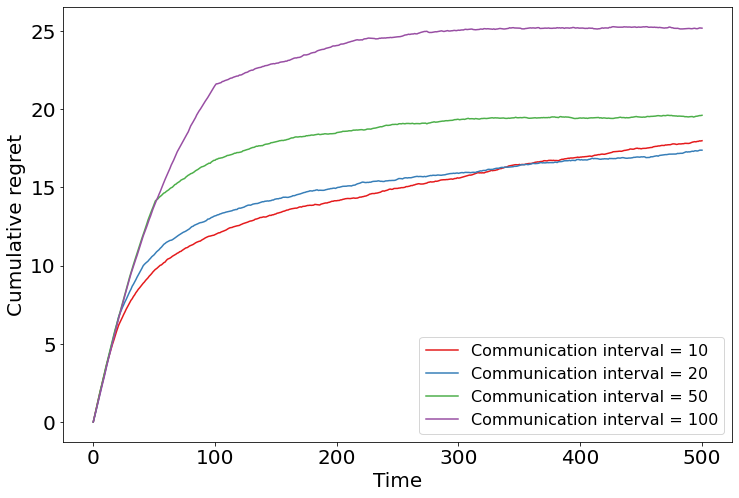

In [8]:
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']

plt.figure(figsize=(12,8))
plt.xlabel("Time", fontsize=20)
plt.ylabel(r"Cumulative regret", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plot_list = []

for update_frequency, curr_color in zip(update_frequency_list, colors):
    experiment_label = f'vts_N{N}_C{update_frequency}_cycle'
    curr_plot, = plt.plot(avg_cumm_regret[experiment_label], color=curr_color, label = f"Communication interval = {update_frequency}")
    plot_list.append(curr_plot)
    
filename = 'results_T{}_multiAgent_GaussianMixtureExp{}_CommFreq.pdf'.format(max_iter, exp_num)
plt.legend(handles=plot_list, loc='lower right', fontsize=16)
plt.savefig(filename, bbox_inches='tight')
plt.show()
